In [1]:
import os

In [2]:
# On récupère le dossier qui contient nos datasets
data_dir = 'chest_Xray'

In [3]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train', 'val']

In [4]:
# On importe nos différentes dépendences
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Va nous permettre de lire directement un fichier image
from matplotlib.image import imread

In [6]:
# On récupère le chemin pour les data de test
test_path = data_dir + '/test'

# Puis le chemin pour les data d'entrainement
train_path = data_dir + '/train'

In [7]:
os.listdir(train_path)

['PNEUMONIA', 'NORMAL']

In [8]:
# Je récupère le chemin de l'image d'un poumon infécté
pneumonia_x_ray = train_path + '/PNEUMONIA/' + os.listdir(train_path + '/PNEUMONIA')[0]

In [9]:
# On va convertir notre image en un tableau numpy
imread(pneumonia_x_ray)

array([[210, 208, 206, ..., 213, 215, 216],
       [210, 208, 206, ..., 213, 216, 217],
       [210, 208, 205, ..., 213, 216, 218],
       ...,
       [ 16,  15,  14, ...,  47,  47,  47],
       [ 16,  15,  14, ...,  46,  46,  46],
       [ 16,  15,  14, ...,  46,  46,  46]], dtype=uint8)

In [10]:
# On va checker la shape du tableau crée à partir de la radio des poumons
imread(pneumonia_x_ray).shape

(736, 1048)

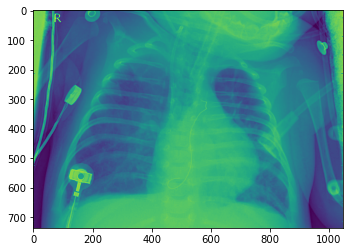

In [11]:
# On va visualiser l'image de la radio des poumons
plt.imshow(imread(pneumonia_x_ray))

In [12]:
# On récupère la première image du dataset d'entrainement pour les poumons normaux (sains)
normal_x_ray = train_path + '/NORMAL/' + os.listdir(train_path + '/NORMAL')[0]

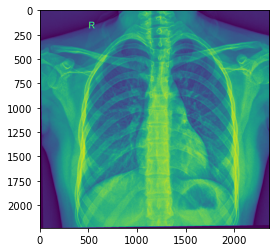

In [13]:
# On peut visualiser la radio pour les poumons infectés par la pneumonie
plt.imshow(imread(normal_x_ray))

In [14]:
# On va checker combien d'image contient notre dataset d'entrainement pour les poumons infectés


In [15]:
len(os.listdir(train_path + '/PNEUMONIA'))

3876

In [16]:
# Et pour les poumons normaux ?
len(os.listdir(train_path + '/NORMAL'))

1341

In [17]:
# Chaque image est transformé en tableau de format d1*d2, e.g: pour la 1ère image de train => (736, 1048)
# Pour entrainer correctement notre CNN correctement, nous avons besoin de l'entrainer sur des images relativement de la
# même taille. Les dimensions d'images doivent donc être le moins disparâtre possible. 
# Pour se faire nous allons essayer de visualiser ces données.

# Dans un premier temps nous allons récupéré les dimensions pour chaque image d'un dataset (train) et les stocker
dim1 = []
dim2 = []
test = 'Hello World'

# On va ensuite itérer la liste des fichier (images) de notre dataset d'entainement (normaux) pour récupérer le chemin de chaque image 
for x_ray_filename in os.listdir(train_path + '/NORMAL'):
    img = imread(train_path + '/NORMAL/' + x_ray_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

[2234, 1067, 1357, 1495, 1966, 1963, 1665, 1086, 885, 1184, 1152, 1106, 2663, 1049, 1302, 1615, 1353, 1364, 1109, 1236, 2183, 2601, 1391, 815, 1303, 978, 1013, 1410, 1647, 1527, 1786, 1959, 1036, 955, 1125, 1677, 1434, 1912, 1221, 1164, 1815, 1020, 2074, 1402, 1353, 1804, 1761, 1499, 1341, 1175, 1121, 1519, 1082, 1739, 1704, 1503, 1228, 1333, 1194, 1005, 1310, 1152, 1565, 1175, 1210, 1634, 1592, 792, 1214, 1511, 1353, 1333, 1496, 1672, 1245, 1387, 1225, 1144, 1209, 1109, 1654, 1013, 1064, 2260, 1330, 1493, 1480, 1020, 1836, 1638, 981, 1804, 1437, 2059, 1422, 1735, 1171, 2321, 1202, 1936, 1306, 2476, 1183, 1446, 1754, 1105, 1337, 1299, 1669, 1920, 1472, 1606, 1425, 1008, 1476, 1403, 1353, 1216, 1268, 1545, 1249, 1245, 1105, 1175, 1106, 1395, 1148, 1334, 1542, 1256, 1532, 1527, 2543, 1044, 1264, 2570, 1777, 1581, 1480, 1290, 1024, 1673, 908, 1487, 1206, 2169, 1719, 1468, 1476, 1484, 1070, 1781, 1573, 994, 1059, 1272, 1294, 1248, 1287, 1604, 1368, 1507, 1090, 950, 1623, 1295, 1437, 1480, 

/Users/younessbennaj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


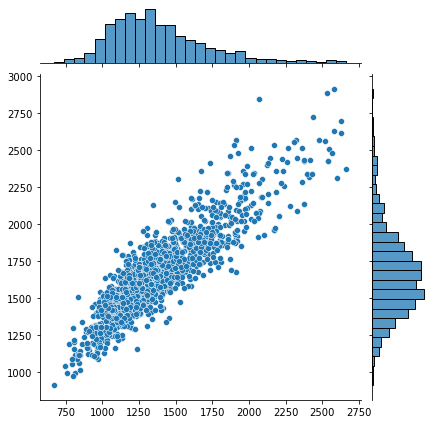

In [18]:
sns.jointplot(dim1, dim2)

In [19]:
# On fait une première moyenne des dimesions dans dim1
np.mean(dim1)

1381.4310216256524

In [20]:
# Puis dans dim2
np.mean(dim2)

1667.7345264727815

In [21]:
# Voici donc la shape avec laquelle je vais redimenssioner mes images
image_shape = (1380, 1668)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [ ]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)